# Airbnb Data-driven Strategy 

```Major Question: Assume we would like to run Airbnb business in Seattle, what would be your housing and pricing strategies to improve our revenue? ```

Data Set: We will use the [Kaggle's Airbnb Seattle dataset](https://www.kaggle.com/datasets/airbnb/seattle). The same copy of the data could be also download from the [google drive](https://drive.google.com/drive/folders/1A6jf182sPDcJZ7sUo0et96NRGKz4eGAs?usp=share_link)

**References**: 
1. for tons of great examples, visit the <a href="https://matplotlib.org/gallery/index.html" target="_blank">matplotlib</a> website.

2. [How to Think about Data Visualization](https://www.youtube.com/watch?v=vTingdk_pVM)

3. [Best Data Visualization Projects of 2020](https://flowingdata.com/2020/12/23/best-data-visualization-projects-of-2020/)

4. [PyViz Tutorials](https://pyviz.org/tutorials/index.html)

In [40]:
#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

1. First look at the data

Calendar first

In [60]:
calendar_dataset = pd.read_csv("calendar.csv")

In [61]:
calendar_dataset.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [62]:
calendar_dataset.shape

(1393570, 4)

In [63]:
#find number of rows in dataset
rows_number = calendar_dataset.shape[0]

#find first and last date of the calendar
min_date = calendar_dataset['date'].min()
max_date = calendar_dataset['date'].max()

print('calendar.csv dataset contains %d rows.' % (rows_number))
print('The first date of observation is %s and the last date is %s.' % (min_date, max_date))

calendar.csv dataset contains 1393570 rows.
The first date of observation is 2016-01-04 and the last date is 2017-01-02.


In [64]:
# count the # of null values in each column
calendar_dataset.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

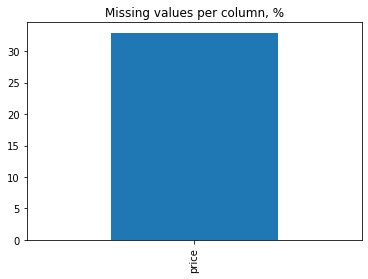

In [65]:
#find percentage of missing values for each column
calendar_dataset_missing = calendar_dataset.isnull().mean()*100

#filter out only columns, which have missing values
calendar_dataset_columns_with_nan = calendar_dataset_missing[calendar_dataset_missing > 0]

#plot the results
calendar_dataset_columns_with_nan.plot.bar(title='Missing values per column, %')

In [47]:
calendar_dataset.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

listing now

In [66]:
listings_dataset = pd.read_csv("listings.csv")

In [67]:
listings_dataset.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [68]:
listings_dataset.shape

(3818, 92)

In [69]:
listings_number = listings_dataset['id'].count()
hosts_number = len(listings_dataset['host_id'].unique())

print('listings.csv dataset contains information on %d listings provided by %d hosts.' % (listings_number, 
                                                                                          hosts_number))

listings.csv dataset contains information on 3818 listings provided by 2751 hosts.


In [70]:
# count the # of null values in each column
listings_dataset.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

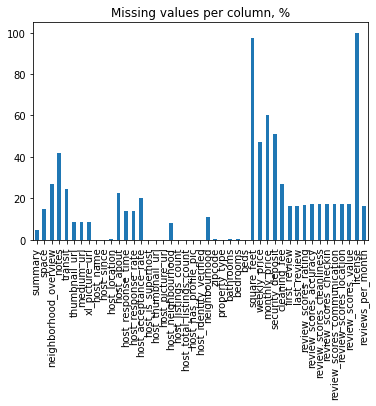

In [72]:
#find percentage of missing values for each column
listings_missing_value = listings_dataset.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_value[listings_missing_value > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')

2. Data preparation

2.1 spreate month,year from "date' represented as a string
  

In [73]:
def month(row):
    return int(row['date'].split('-')[1])

In [74]:
def year(row):
    return int(row['date'].split('-')[0])

In [75]:
def host_since_year(row):
    try:
        host_since = int(row['host_since'].split('-')[0])
    except:
        host_since = np.nan
    return host_since

2.2 Fill in dummy column for values

In [76]:
def val_from_list(row, column_name, value):
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

2.3 Split values in columns, which contain lists

get dictionary of unique values in lists across dataset rows

In [78]:
def columns_from_list(df, column_name, max_dummies_num = 10):
    values_dictionary = {}
    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dictionary:
                values_dictionary[value] = values_dictionary[value] + 1
            else:
                values_dictionary[value] = 0              
    values_sorted = sorted(values_dictionary.items(), key=lambda kv: kv[1], reverse = True)
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: val_from_list(row, column_name, value[0]),axis=1)
        
    return

2.4 check if there is addition fee for exatra people

In [79]:
def get_extra_people_fee(row):
    if row['extra_people'] == '$0.00':
        return 0.0
    else:
        return 1.0

2.5 **Main dataset cleaning function**

This code is originally created by ALEKSANDRA DEIS (2019) AirBnB Seattle Reservation Prices Analysis (Version 2.0) [Source code]. https://www.kaggle.com/code/aleksandradeis/airbnb-seattle-reservation-prices-analysis

Jianwei Luo has been authorized to edit



In [96]:
def dataset_cleaning(listings_dataset, calendar_dataset):
    #merge datasets
    listings_dataset = listings_dataset.rename(index=str, columns={"id": "listing_id"})
    DataFrame = pd.merge(calendar_dataset, listings_dataset, on = 'listing_id')
    
    #drop the irrelevant columns
    columns_to_drop = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']
    DataFrame = DataFrame.drop(columns = columns_to_drop)
    
    #convert date from the calendar into month and drop the date colum
    DataFrame['month'] = DataFrame.apply(lambda row: month(row),axis=1)
    DataFrame['year'] = DataFrame.apply(lambda row: year(row),axis=1)
    DataFrame = DataFrame.drop(columns = ['date'])
    
    #remove rows where price_x == nan, because price will be used as response column
    DataFrame = DataFrame.dropna(subset=['price_x'])
    
    #convert price to number and drop the price_x column
    DataFrame['price'] = DataFrame['price_x'].astype(str)
    DataFrame['price'] = DataFrame['price'].str.replace("[$, ]", "").astype("float")
    DataFrame = DataFrame.drop(columns = ['price_x'])
    
    #convert host_since date into number and fill in missing values, drop the original column
    DataFrame['host_since_year'] = DataFrame.apply(lambda row: host_since_year(row),axis=1)
    DataFrame['host_since_year'].fillna(DataFrame['host_since_year'].mean(), inplace = True)
    DataFrame = DataFrame.drop(columns = ['host_since'])
    
    #convert host_response_rate into number and fill in missing values, drop the original column
    DataFrame['host_response_rate_num'] = DataFrame['host_response_rate'].astype(str)
    DataFrame['host_response_rate_num'] = DataFrame['host_response_rate_num'].str.replace("%", "").astype("float")
    DataFrame['host_response_rate_num'].fillna(DataFrame['host_response_rate_num'].mean(), inplace = True)
    
    DataFrame['host_response_rate_buckets'] = pd.qcut(DataFrame['host_response_rate_num'], 5, labels=False, duplicates = 'drop')
    DataFrame = DataFrame.drop(columns = ['host_response_rate', 'host_response_rate_num'])
    
    #fill missing values with mean value for host_listings_count
    DataFrame['host_listings_count'].fillna(DataFrame['host_listings_count'].mean(), inplace = True)
    
    #split host_verifications into dummy columns and drop the original column
    columns_from_list(DataFrame, 'host_verifications')
    DataFrame = DataFrame.drop(columns = ['host_verifications'])
    
     #fill in missing values for bathrooms, bedrooms and beds with mode
    DataFrame['bathrooms'] = DataFrame['bathrooms'].fillna(DataFrame['bathrooms'].mode()[0])
    DataFrame['bedrooms'] = DataFrame['bedrooms'].fillna(DataFrame['bedrooms'].mode()[0])
    DataFrame['beds'] = DataFrame['beds'].fillna(DataFrame['beds'].mode()[0])
    
    #split amenities into dummy columns and drop the original column
    columns_from_list(DataFrame, 'amenities')
    DataFrame = DataFrame.drop(columns = ['amenities'])
    
    #turn extra people fee into binary column (1 - if fee for extra people is charged, 0 - otherwise)
    DataFrame['extra_people_fee'] = DataFrame.apply(lambda row: get_extra_people_fee(row),axis=1)
    DataFrame = DataFrame.drop(columns = ['extra_people'])

    
    #fill missing values for review scores columns
    review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
    for column in review_scores_columns:
        DataFrame[column].fillna(DataFrame[column].mean(), inplace = True)
    
    return DataFrame

    #This code is created by ALEKSANDRA DEIS (2019) AirBnB Seattle Reservation Prices Analysis (Version 2.0) [Source code]. https://www.kaggle.com/code/aleksandradeis/airbnb-seattle-reservation-prices-analysis
    #Jianwei Luo has been authorized to edit

In [97]:
DataFrame = dataset_cleaning(listings_dataset, calendar_dataset)

In [98]:
#find minimum, maximum and average price for listing
min_price = DataFrame['price'].min()
max_price = DataFrame['price'].max()
mean_price = DataFrame['price'].mean()

print('Minimum price per listing is %d$.' % (min_price))
print('Maximum price per listing is %d$' % (max_price))
print('Average price per listing is %d$.' % (mean_price))

Minimum price per listing is 10$.
Maximum price per listing is 1650$
Average price per listing is 137$.


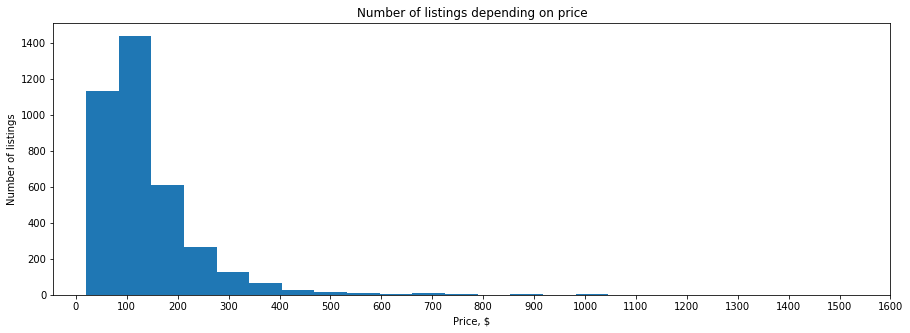

In [99]:
#get the average price for each listing
mean_price_for_listing = DataFrame.groupby('listing_id').mean()['price']

#plot
plt.figure(figsize=(15,5))
plt.hist(mean_price_for_listing, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Number of listings depending on price')


plt.savefig('Price distrubution.png')

plt.show()

In [ ]:
#Your Second Plot

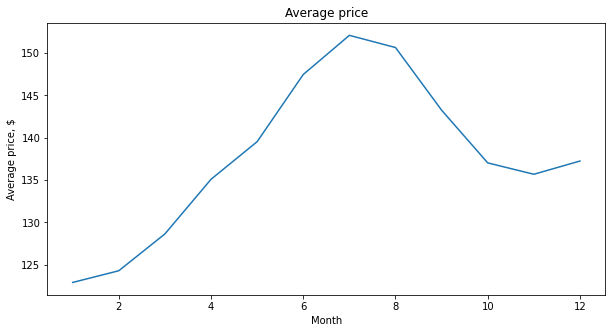

In [100]:

average_price_by_month = DataFrame.groupby(['month'])['price'].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')

plt.savefig('average price for month')

plt.show()

From plot 1, we can conclude that listings under $200 are more popular, so it is predictable that if listings priced above two hundred start to reduce their prices, then their sales will rise so that total revenue will increase because listings that cannot be rented out do not earn any money. As we can see from plot 2, the average price is highest directly in June to July and lowest between December and January, indicating that a large amount of rental demand occurs in June to July and few people in December to January. We can use the price differentiation method, we increase the price in the high season from June to July and decrease the price in the low season from December to January, so we can make more money.


Reference: ALEKSANDRA DEIS (2019) AirBnB Seattle Reservation Prices Analysis (Version 2.0) [Source code]. https://www.kaggle.com/code/aleksandradeis/airbnb-seattle-reservation-prices-analysis